In [1]:
# https://pole.uchicago.edu/public/data/chown18/
import simulation as sim
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from colossus.halo import mass_adv
from colossus.cosmology import cosmology
from astropy.io import fits


hdul = fits.open('2500d_cluster_sample_Bocquet19.fits')
# print(hdul[1].header)
d = hdul[1].data
# print(d[0])
result = np.ones(516)
result_u = np.ones(516)
result_l = np.ones(516)
ori = np.ones(516)
s = np.ones(516)
s_u = np.ones(516)
s_l = np.ones(516)

omega_m0, omega_b0, cosmo_h, sigma8, ns = sim.cosmo_para()
params = {'flat': True, 'H0': cosmo_h*100, 'Om0': omega_m0, 'Ob0': omega_b0, 'sigma8':sigma8, 'ns': ns}
cosmology.addCosmology('myCosmo', **params)
cosmo = cosmology.setCosmology('myCosmo')

z_list = []
for i in range(676):
    z_list = np.append(z_list,d[i][8])

index = np.argwhere(z_list>0)
theta = [0.25, 0.5,  0.75, 1,    1.25, 1.5,  1.75, 2,    2.25, 2.5,  2.75, 3]
scale = [0.452,0.926,1.225,1.402,1.509,1.577,1.622,1.653,1.676,1.692,1.705,1.714]
# a = np.round(d[0][5],2)
# print(a)
# print(np.argwhere(theta==a)[0][0])
# for i in range(516):
#     ind = index[i][0]
#     result[i] *= np.round(d[ind][5],2)
    
# print(result[result>2])
#Select Telescope and Observation Frequency
tele = 'SPT'
f = 1

#Retrieve Observation-related Parameters
beam_size, noise_level = sim.tele_para(tele, f)

#Converting to correct scale
f *= 1e9

for i in range(516):
    print(i)
    nums = []
    ind = index[i][0]
    ang = np.round(d[ind][5],2)
    place = np.argwhere(theta==ang)[0][0]
    ori[i] *= d[ind][6] / scale[place]
    zed = d[ind][8]
    
    M = d[ind][14] * 1e14
    M_u = (d[ind][14] + d[ind][15]) * 1e14
    M_l = (d[ind][14] - d[ind][16]) * 1e14
    
    m, r, c = mass_adv.changeMassDefinitionCModel(M/0.7, zed, '500c', 'vir')
    M = m*0.7
    
    m, r, c = mass_adv.changeMassDefinitionCModel(M_u/0.7, zed, '500c', 'vir')
    M_u = m*0.7
    
    m, r, c = mass_adv.changeMassDefinitionCModel(M_l/0.7, zed, '500c', 'vir')
    M_l = m*0.7
    
    radius = np.linspace(0.1, 9, 10)     #arcmin
    new_r = sim.arcmin_to_Mpc(radius, zed)
    
    battaglia_pro = np.array([sim.battaglia_profile(r, M, zed) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)
    s[i] *= sim.generate_img(radius, y_pro, f, noise_level, beam_size, zed, nums)
    result[i] *= (s[i]-ori[i])/ori[i] * 100
    
    battaglia_pro = np.array([sim.battaglia_profile(r, M_u, zed) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)
    s_u[i] *= sim.generate_img(radius, y_pro, f, noise_level, beam_size, zed, nums)
    result_u[i] *= (s_u[i]-ori[i])/ori[i] * 100
    
    battaglia_pro = np.array([sim.battaglia_profile(r, M_l, zed) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)
    s_l[i] *= sim.generate_img(radius, y_pro, f, noise_level, beam_size, zed, nums)
    result_l[i] *= (s_l[i]-ori[i])/ori[i] * 100

print(result)

Deleted outdated persistence file, no further action needed.
0
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persi

/Users/brian_z/opt/anaconda3/lib/python3.9/site-packages/colossus/utils/storage.py:245: UserWarning: Encountered file error while reading cache file. This usually 						happens when switching between python 2 and 3. Deleting cache file.
  warnings.warn('Encountered file error while reading cache file. This usually \


2
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.


/Users/brian_z/opt/anaconda3/lib/python3.9/site-packages/colossus/utils/storage.py:239: UserWarning: Could not delete outdated persistence file /Users/brian_z/.colossus/cache/cosmology/myCosmo_0ded0e61be398480ca5213e8e20a01a3. Please delete manually.
  warnings.warn('Could not delete outdated persistence file %s. Please delete manually.' \


Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
3
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persi

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
17
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
22
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
31
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
36
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
41
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
46
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
55
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
60
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
65
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

79
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
84
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
93
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
98
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated pers

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
103
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
117
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
126
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
140
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
154
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
168
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
182
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
196
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
205
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
214
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
223
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
232
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
241
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
250
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
259
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
268
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
277
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
286
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
295
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
304
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
325
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
334
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
343
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
352
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
361
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
370
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
379
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
388
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
397
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
406
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
415
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
424
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
433
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
442
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
451
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
460
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
469
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
478
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
487
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
496
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
505
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
514
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated per

In [38]:
print(result.mean())
print(np.std(result))
# u10 = result[result<100]
# print(u10[u10>-100].shape)

-0.8384774867755098
70.90646315493811


In [44]:
hdul = fits.open('2500d_cluster_sample_Bocquet19.fits')
# print(hdul[1].header)
d = hdul[1].data

Text(0, 0.5, 'dif %')

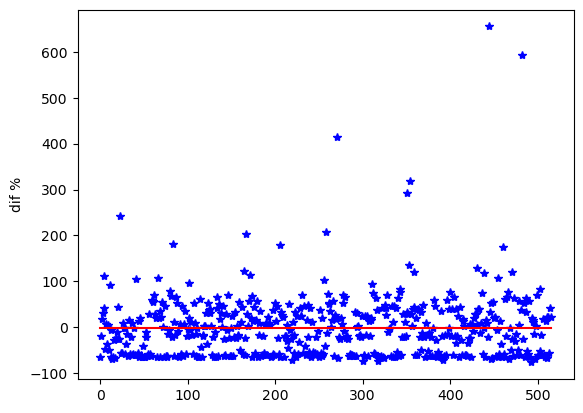

In [45]:
b = np.arange(516)
c = np.ones(516) * result.mean()
plt.plot(b,result, 'b*')
plt.plot(b,c, 'r')
plt.ylabel("dif %")

24.114341085271317


(array([515.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,  181.5,  361. ,  540.5,  720. ,  899.5, 1079. , 1258.5,
        1438. , 1617.5, 1797. ]),
 <BarContainer object of 10 artists>)

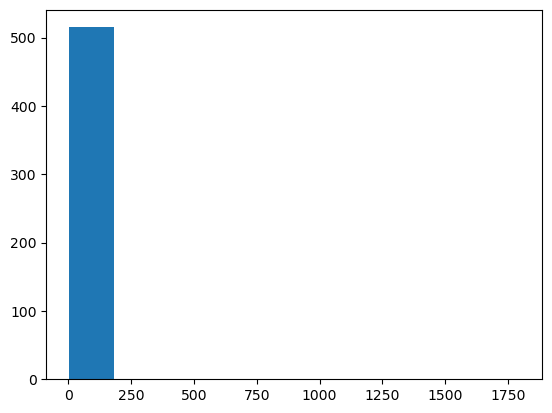

In [46]:
# Percentage uncertainty in Compton-y
com_un = np.arange(516)
z_un = np.arange(516)
m_un = np.arange(516)
m1_un = np.arange(516)
m2_un = np.arange(516)
for i in range(516):
    ind = index[i][0]
    com_un[i] = d[ind][7]/d[ind][6] * 100
    z_un[i] = d[ind][9]/d[ind][8] * 100
    m_un[i] = (d[ind][15] + d[ind][16])/d[ind][14] * 100
    m1_un[i] = d[ind][15]/d[ind][14] * 100
    m2_un[i] = d[ind][16]/d[ind][14] * 100
print(com_un.mean())
plt.hist(com_un)

5.226744186046512


(array([380., 125.,   5.,   3.,   0.,   0.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

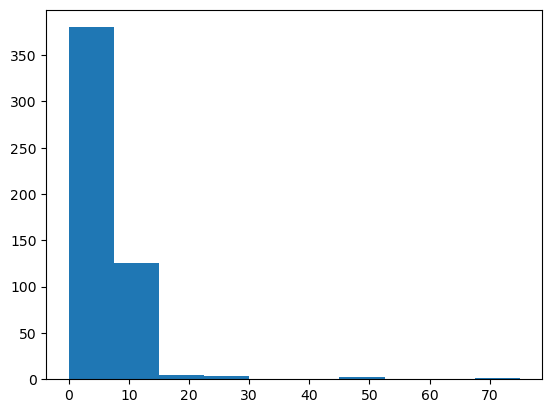

In [47]:
# Percentage uncertainty in Redshift
print(z_un.mean())
plt.hist(z_un)

32.82751937984496


(array([ 25.,  34.,  41.,  30.,  23.,  38.,  42.,  41.,  67., 175.]),
 array([21. , 22.8, 24.6, 26.4, 28.2, 30. , 31.8, 33.6, 35.4, 37.2, 39. ]),
 <BarContainer object of 10 artists>)

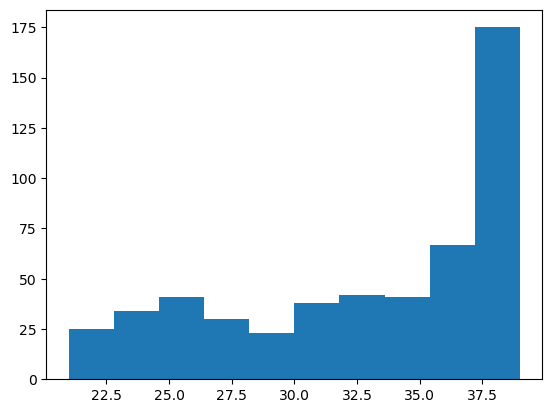

In [48]:
# Percentage uncertainty in Mass
print(m_un.mean())
plt.hist(m_un)

14.598837209302326


(array([ 14.,  29.,  47.,  27.,  39.,  31.,  66., 127., 135.,   1.]),
 array([ 9. ,  9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <BarContainer object of 10 artists>)

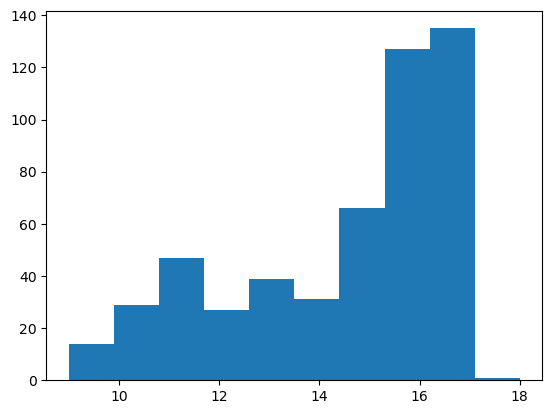

In [49]:
# Percentage uncertainty in M_up
print(m1_un.mean())
plt.hist(m1_un)

17.775193798449614


(array([ 32.,  34.,  39.,  47.,  44.,  47.,  30.,  44.,  39., 160.]),
 array([11. , 12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. ]),
 <BarContainer object of 10 artists>)

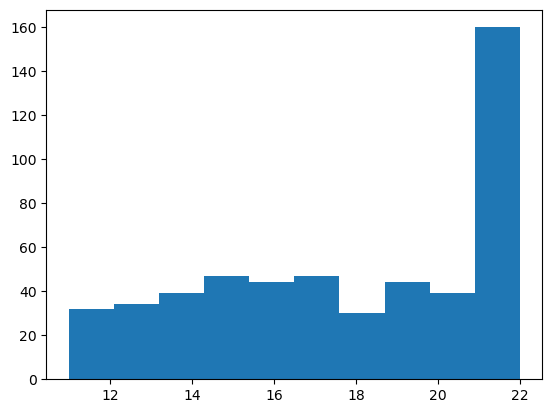

In [50]:
# Percentage uncertainty in M_down
print(m2_un.mean())
plt.hist(m2_un)

(array([164., 234.,  76.,  22.,   7.,   6.,   4.,   0.,   1.,   2.]),
 array([ 2.46634723,  3.79108106,  5.11581488,  6.4405487 ,  7.76528253,
         9.09001635, 10.41475017, 11.739484  , 13.06421782, 14.38895164,
        15.71368547]),
 <BarContainer object of 10 artists>)

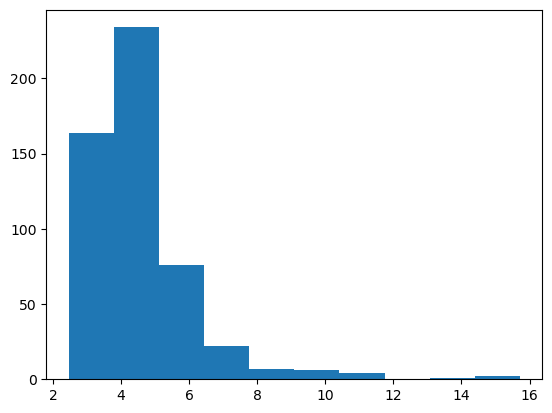

In [54]:
m_lib = np.ones(516)
z_lib = np.ones(516)
ori2 = np.ones(516)
y_uncertainty = np.ones(516)
for i in range(516):
    ind = index[i][0]
    m_lib[i] *= d[ind][14]
    z_lib[i] *= d[ind][8]
    ori2[i] *= d[ind][6]
    y_uncertainty[i] *= d[ind][7]
plt.hist(m_lib)

(array([ 45.,  88., 124., 125.,  59.,  45.,  15.,   8.,   5.,   2.]),
 array([0.0552    , 0.21968   , 0.38416001, 0.54864001, 0.71312002,
        0.87760002, 1.04208003, 1.20656003, 1.37104004, 1.53552004,
        1.70000005]),
 <BarContainer object of 10 artists>)

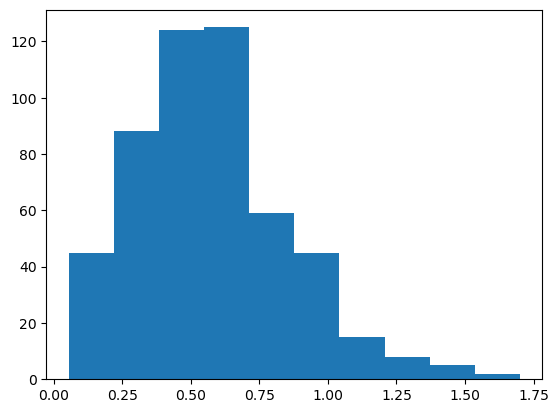

In [55]:
plt.hist(z_lib)

In [11]:
zed = 0.576
compton = np.ones(20)
M = np.linspace(0.2, 2.5, 20) * 1e15

for i in range(20):
    nums = []

    #Select Telescope and Observation Frequency
    tele = 'SPT'
    f = 1

    #Retrieve Observation-related Parameters
    beam_size, noise_level = sim.tele_para(tele, f)

    #Converting to correct scale
    f *= 1e9
    
    radius = np.linspace(0.1, 9, 10)     #arcmin
    new_r = sim.arcmin_to_Mpc(radius, zed)
    battaglia_pro = np.array([sim.battaglia_profile(r, M[i], zed) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)

    compton[i] *= sim.generate_img(radius, y_pro, f, noise_level, beam_size, zed, nums)
    
m, r, c = mass_adv.changeMassDefinitionCModel(M/0.7, zed, 'vir', '500c')
m *= 0.7


Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persist

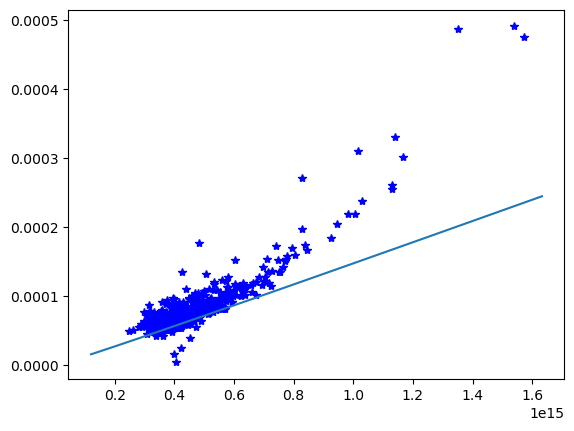

In [56]:
m_real = m_lib * 1e14
plt.plot(m_real, ori2,'b*')
plt.plot(m,compton)
# plt.plot(m_real,s,'r*')
# plt.plot(m_real,s_u,'g*')
# plt.plot(m_real,s_l,'y*')

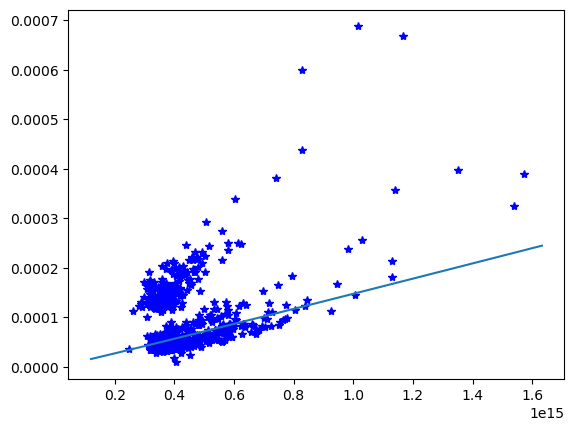

In [57]:
plt.plot(m_real, ori,'b*')
plt.plot(m,compton)
# plt.plot(m_lib,s,'r*')

262


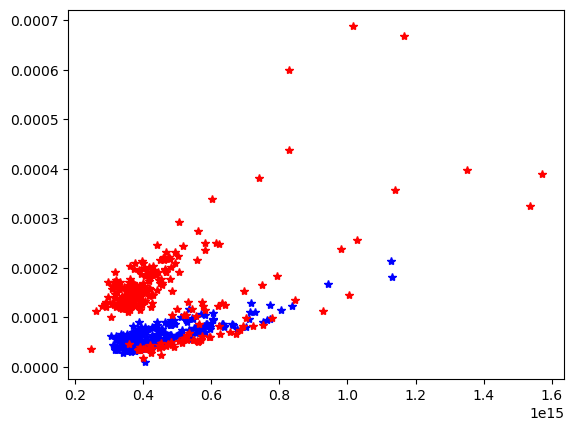

In [58]:
y_upper = ori + y_uncertainty
y_lower = ori - y_uncertainty
m_in = []
m_out = []
y_in = []
y_out = []
count = 0
for i in range(516):
    if y_lower[i] > s_u[i] or y_upper[i] < s_l[i]:
        m_out.append(m_real[i])
        y_out.append(ori[i])
    else:
        m_in.append(m_real[i])
        y_in.append(ori[i])
        count += 1
plt.plot(m_in,y_in,'b*')
plt.plot(m_out,y_out,'r*')
print(count)

In [15]:
# print(hdul[1].header)

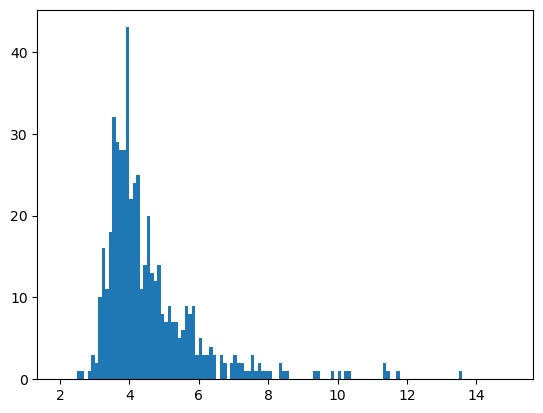

In [92]:
m_new = np.round(m_lib,decimals = 1)
index = np.argsort(m_new)
b = np.round(np.linspace(2,15,131), decimals = 1)
count = plt.hist(m_new,b)

In [140]:
mean = []
std = []
comp_min = []
comp_max = []
temp = []
for i in range(515):
    arg_cur = index[i]
    arg_nex = index[i+1]
    m_cur = m_new[arg_cur]
    m_nex = m_new[arg_nex]
    y_cur = ori2[arg_cur]
    y_nex = ori2[arg_nex]
    temp.append(y_cur)
    if(m_cur != m_nex):
        if(temp != []):
            print(len(mean))
            print(temp)
            temp = np.array(temp)
            mean.append(temp.mean())
            std.append(temp.std())
            comp_min.append(temp.min())
            comp_max.append(temp.max())
        temp = []

0
[4.9735612265067175e-05]
1
[5.0532024033600464e-05]
2
[5.583965321420692e-05]
3
[5.7311142882099375e-05, 5.49721262359526e-05, 5.934745422564447e-05]
4
[7.762652239762247e-05, 6.38447527308017e-05]
5
[5.726820745621808e-05, 5.804058673675172e-05, 5.640308154397644e-05, 5.25933392054867e-05, 5.295682785799727e-05, 5.783465530839749e-05, 7.081009971443564e-05, 7.354984700214118e-05, 4.524715768638998e-05, 7.736028783256188e-05]
6
[5.1718852773774415e-05, 6.238534115254879e-05, 5.464702189783566e-05, 5.604426041827537e-05, 4.998692384106107e-05, 6.686012784484774e-05, 7.889118569437414e-05, 8.645382331451401e-05, 6.863501766929403e-05, 4.96831962664146e-05, 4.8634818085702136e-05, 5.16534892085474e-05, 7.50345061533153e-05, 6.321457476587966e-05, 5.67752358620055e-05, 7.274335803231224e-05]
7
[7.160077075241134e-05, 5.725885057472624e-05, 5.482112101162784e-05, 5.343391967471689e-05, 7.126192940631881e-05, 5.6152344768634066e-05, 5.1532108045648783e-05, 5.5877459089970216e-05, 5.5205699

0.0823740375403778


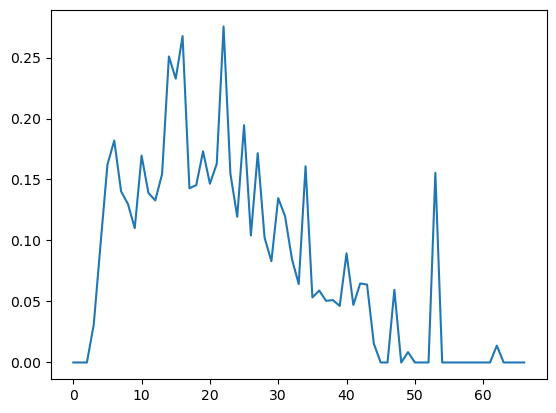

In [103]:
mean = np.array(mean)
std = np.array(std)
comp_min = np.array(comp_min)
comp_max = np.array(comp_max)
plt.plot(std/mean)
print((std/mean).mean())

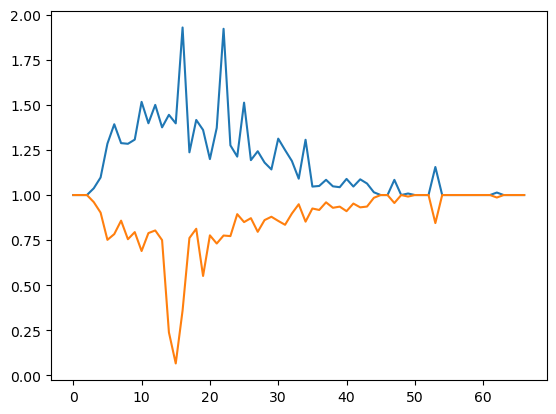

In [104]:
plt.plot(comp_max/mean)
plt.plot(comp_min/mean)

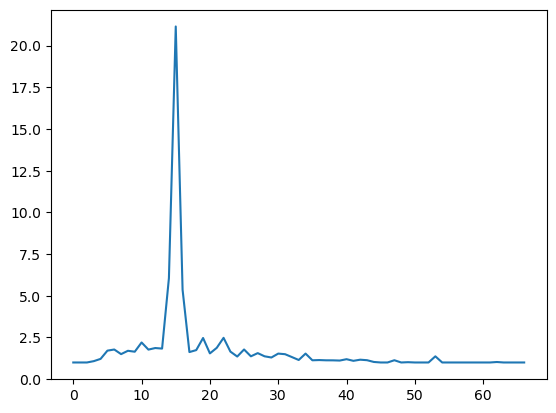

In [105]:
plt.plot(comp_max/comp_min)

In [106]:
print(comp_max/comp_min)

[ 1.          1.          1.          1.07959175  1.21586378  1.70972701
  1.77761173  1.50091966  1.70079313  1.64550029  2.1991664   1.7716881
  1.86622991  1.83340015  6.05728135 21.14712249  5.36074433  1.62400674
  1.7420116   2.46820057  1.54437981  1.87715308  2.47814289  1.65149061
  1.35682571  1.77912506  1.36908353  1.56120405  1.37036737  1.29819198
  1.53247658  1.49646402  1.32457789  1.14927703  1.53258119  1.13125636
  1.14510886  1.13002829  1.12811818  1.1151558   1.19650252  1.09903756
  1.16671481  1.13643323  1.03103662  1.          1.          1.13436225
  1.          1.01712043  1.          1.          1.          1.36823652
  1.          1.          1.          1.          1.          1.
  1.          1.          1.02802969  1.          1.          1.
  1.        ]


In [93]:
print(count)

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  3.,  2., 10., 16.,
       11., 18., 32., 29., 28., 28., 43., 22., 24., 25., 11., 14., 20.,
       13., 12., 14.,  8.,  7.,  9.,  7.,  7.,  5.,  6.,  9.,  8.,  9.,
        3.,  5.,  3.,  3.,  4.,  3.,  0.,  3.,  2.,  0.,  2.,  3.,  2.,
        2.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  2.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,
        3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,
        4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,
        5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.

In [108]:
cata = []
for i in range(45,45+18):
    cata.append(ori2[index[i]])
cata = np.array(cata)
print(cata.max()/cata.min())

1.7007931345306977


In [116]:
new10 = np.array([5.4481966799357906e-05, 6.699585355818272e-05, 5.3906489483779296e-05, 4.079000973433722e-06, 5.960774069535546e-05, 5.9366659115767106e-05, 6.11453433521092e-05, 7.066893886076286e-05, 6.432067311834544e-05, 5.4765423556091264e-05, 6.31268703727983e-05, 6.131271948106587e-05, 6.422570731956512e-05, 5.977532055112533e-05, 7.499501225538552e-05, 8.625913324067369e-05, 6.0721347836079076e-05, 5.833237446495332e-05, 6.115048745414242e-05, 6.809909245930612e-05, 8.257727313321084e-05, 5.9103273088112473e-05, 6.885993934702128e-05, 6.368633330566809e-05])
print(new10.max())

8.625913324067369e-05


In [136]:
index2 = np.argwhere(z_list>0)
print(index[260])
print(index2[462][0])
print(d[609])

462
609
('SPT-CLJ2251-4848', 342.78906, -48.803221, 'ra23hdec-45', 6.4179893, 0.25, 8.625913e-05, 2.0915879e-05, 0.87, 0.08415, 0.0, 0, 0, 0, 4.145350190925576, 0.6378509137739989, 0.7056889698055713, 6.575332504466031, 1.030298076465055, 1.1481998935668454, 3.719922126503164, 0.6369820648354718, 0.8591802725441182, 5.887220038465821, 1.0238815147372122, 1.3915257260282017)


In [138]:
print(index[248])
print(index2[444][0])
print(d[589])

444
589
('SPT-CLJ2223-5015', 335.81438, -50.266363, 'ra22h30dec-55', 4.8557777, 0.25, 4.079001e-06, 7.331885e-05, 0.24, 0.03572, 0.0, 0, 0, 0, 4.058450502690828, 0.6966629106678948, 0.8775733471363258, 6.126336704436716, 1.0667453388133685, 1.354675326362444, 3.4673195598426862, 0.6939550101902499, 0.9217244047553002, 5.2186233432522355, 1.0588419008295995, 1.4184133029434332)


In [134]:
print(hdul[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  194 / length of dimension 1                          NAXIS2  =                  677 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   26 / number of table fields                         TTYPE1  = 'SPT_ID  '                                                            TFORM1  = '16A     '                                                            TTYPE2  = 'RA      '                                                            TFORM2  = 'D       '                                                            TTYPE3  = 'DEC     '                    

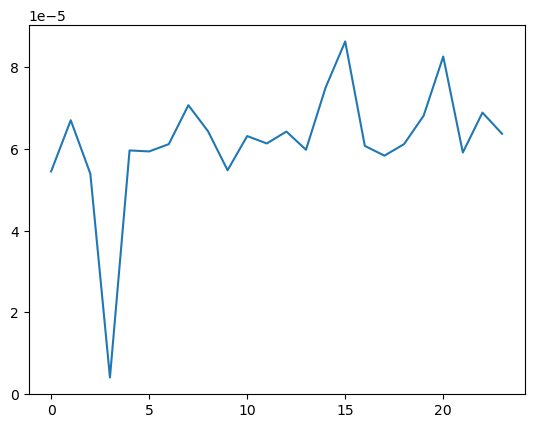

In [139]:
#For set 16
plt.plot([5.4481966799357906e-05, 6.699585355818272e-05, 5.3906489483779296e-05, 4.079000973433722e-06, 5.960774069535546e-05, 5.9366659115767106e-05, 6.11453433521092e-05, 7.066893886076286e-05, 6.432067311834544e-05, 5.4765423556091264e-05, 6.31268703727983e-05, 6.131271948106587e-05, 6.422570731956512e-05, 5.977532055112533e-05, 7.499501225538552e-05, 8.625913324067369e-05, 6.0721347836079076e-05, 5.833237446495332e-05, 6.115048745414242e-05, 6.809909245930612e-05, 8.257727313321084e-05, 5.9103273088112473e-05, 6.885993934702128e-05, 6.368633330566809e-05])

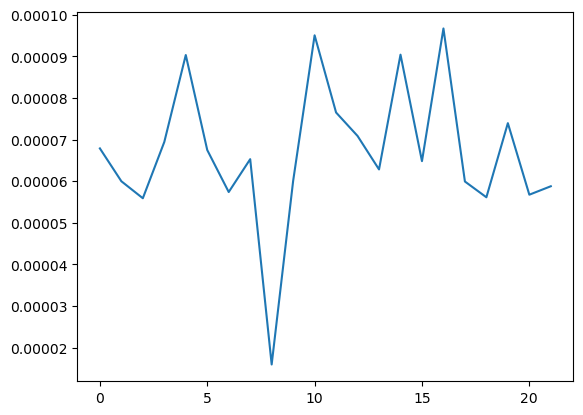

In [141]:
#For set 15
plt.plot([6.787579332012683e-05, 5.99835766479373e-05, 5.5902291933307424e-05, 6.943253538338467e-05, 9.03149411897175e-05, 6.748691521352157e-05, 5.7395627663936466e-05, 6.529479287564754e-05, 1.5963096302584745e-05, 6.005408431519754e-05, 9.505176421953365e-05, 7.650117913726717e-05, 7.086942787282169e-05, 6.28266207058914e-05, 9.04027619981207e-05, 6.481449236162007e-05, 9.669296559877694e-05, 5.992508158669807e-05, 5.613623216049746e-05, 7.394485146505758e-05, 5.6755881814751774e-05, 5.878471347386949e-05])

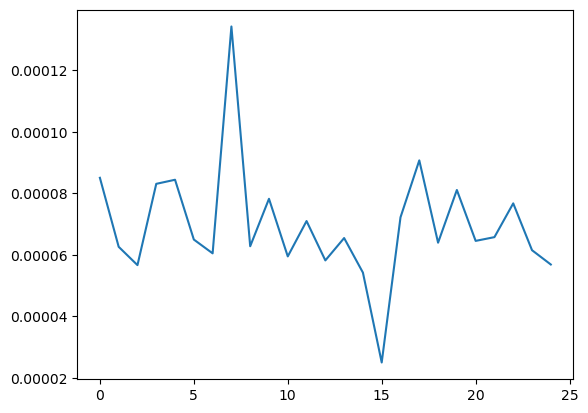

In [142]:
#For set 17
plt.plot([8.506487210979685e-05, 6.263760587899014e-05, 5.6685890740482137e-05, 8.310146222356707e-05, 8.44310998218134e-05, 6.499789742520079e-05, 6.0511421906994656e-05, 0.0001342479808954522, 6.281958485487849e-05, 7.824102067388594e-05, 5.951881394139491e-05, 7.100940274540335e-05, 5.821854210807942e-05, 6.548332021338865e-05, 5.424952178145759e-05, 2.5042787456186488e-05, 7.22249096725136e-05, 9.072919056052342e-05, 6.397510878741741e-05, 8.110474300337955e-05, 6.455980474129319e-05, 6.578057946171612e-05, 7.675723463762552e-05, 6.153379945317283e-05, 5.688601959263906e-05])